In [27]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pickle
from scipy.optimize import root

from potencial import get_expressions
%matplotlib widget

In [62]:
X1, X2, I_L, I_C, I_R = sp.symbols('X1 X2 I_L I_C I_R')
tau = 1
values = {
    "tau": tau,
    "c": 1,
    "g": 1,
    "s0": 1,
    "IL": 0.3,
    "IC": 0,
    "IR": 0,
    "I_I": 1/3,
    "sL": 0.01,
    "sC": -0.08,
    "sR": -0.05,
}

potencial_num, F1_num, F2_num, H_num = get_expressions(values, type = "numeric", substituted_I = True)

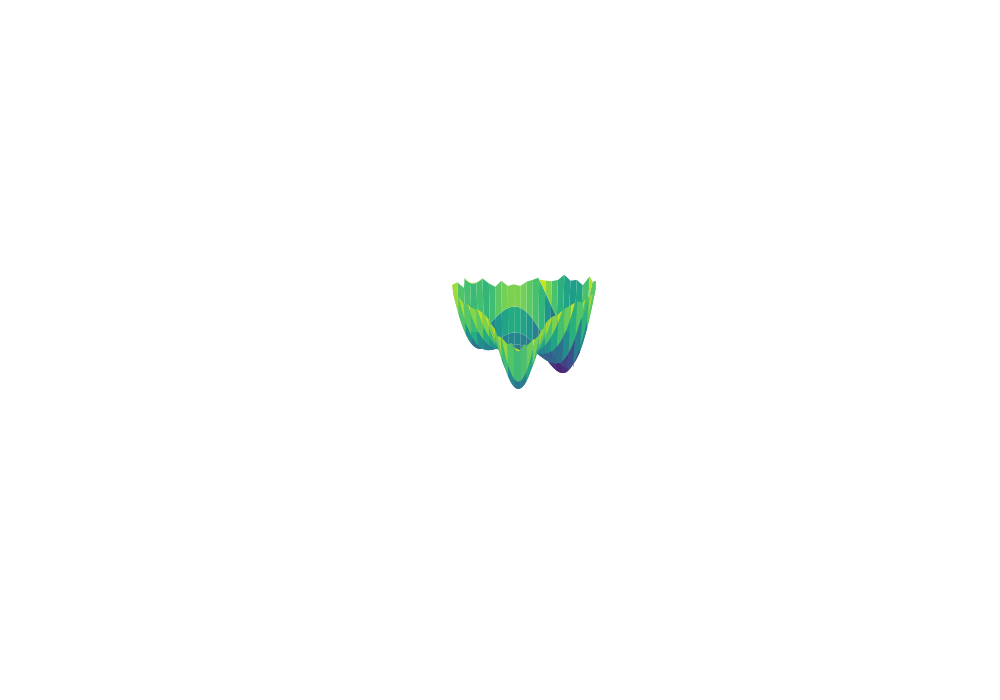

In [ ]:
x_vals = np.linspace(-10, 10, 300)
y_vals = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x_vals, y_vals)

Z = potencial_num(X, Y)

# Create a mask for the values outside our desired range
mask = (Z < -40) | (Z > 5)
Z_masked = np.ma.masked_array(Z, mask)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_masked, cmap='viridis', alpha=1, antialiased=True)

# plt.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=70, azim = -90)

ax.grid(False)       # quita la rejilla de los ejes
ax.set_axis_off()   
plt.show()

In [64]:
import meshio
verts = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

# Caras (dos triángulos por celda)
faces = []
n, m = X.shape
for i in range(n-1):
    for j in range(m-1):
        idx = i*m + j
        faces.append([idx, idx+1,   idx+m])
        faces.append([idx+1, idx+m+1, idx+m])
faces = np.array(faces)

# Exportar la malla superficial
meshio.write_points_cells(
    "surface_biased2.stl",
    points=verts,
    cells=[("triangle", faces)]
)
print(f"🔹 Surface con exportada como surface.stl")


🔹 Surface con exportada como surface.stl
